<h1><center>K - Means Clustering</center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
digit_dataset = pd.read_csv("C:\\Users\\graykar\\Downloads\\Pyhton\\Data Files\\dataset_30_page-blocks.csv")

In [3]:
digit_dataset.head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [4]:
digit_X = digit_dataset.iloc[:, :-1]
digit_y = digit_dataset['class']

In [5]:
# By default train_test_split does STRATIFIED split based on label (y-value).
from sklearn.model_selection import train_test_split
digit_X_train, digit_X_test, digit_y_train, digit_y_test = train_test_split(digit_X, digit_y, test_size=0.3)

In [6]:
digit_X_train.shape

(3831, 10)

In [7]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#digit_X_train = sc.fit_transform(digit_X_train)

#### "How to choose K ?"
  * One way to determine the number of clusters is to look at how the total of "within cluster sum of squares (WCSS)" behaves when the number of cluster changes. When you plot the number of clusters and the total WCSS (elbow-curve), the optimal number of clusters is when the total WCSS drops radically. We can access this value using "sklearn.cluster.KMeans.inertia_" attribute.

In [8]:
wcss = [] # Within Cluster Sum of Squares
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 42)
    kmeans.fit(digit_X_train)
    preds = kmeans.predict(digit_X_train)
    
    wcss.append(kmeans.inertia_)
    silhou_score = silhouette_score(digit_X_train, preds)
    silhouette_scores.append(silhou_score)
    
    print("For n_clusters = {}, silhouette score is {})".format(k, silhou_score))    

For n_clusters = 2, silhouette score is 0.9791134071301427)
For n_clusters = 3, silhouette score is 0.9152053925834983)
For n_clusters = 4, silhouette score is 0.8025025255052872)
For n_clusters = 5, silhouette score is 0.811754205937273)
For n_clusters = 6, silhouette score is 0.7799348530542811)
For n_clusters = 7, silhouette score is 0.7009783787104635)
For n_clusters = 8, silhouette score is 0.6996639801251867)
For n_clusters = 9, silhouette score is 0.65006760532204)
For n_clusters = 10, silhouette score is 0.6497212744501341)
For n_clusters = 11, silhouette score is 0.647121546660576)
For n_clusters = 12, silhouette score is 0.6431892388117139)
For n_clusters = 13, silhouette score is 0.6513804142236088)
For n_clusters = 14, silhouette score is 0.6000664707369772)
For n_clusters = 15, silhouette score is 0.5994654670042121)
For n_clusters = 16, silhouette score is 0.6437830771441441)
For n_clusters = 17, silhouette score is 0.5926577081342719)
For n_clusters = 18, silhouette scor

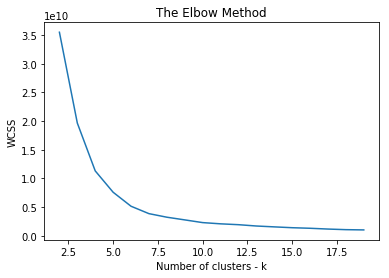

In [9]:
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters - k')
plt.ylabel('WCSS')
plt.show()

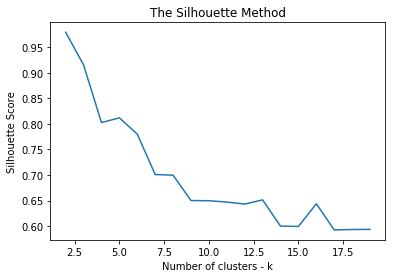

In [10]:
plt.plot(range(2, 20), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters - k')
plt.ylabel('Silhouette Score')
plt.show()

In [34]:
best_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
X_clusters = best_kmeans.fit_predict(digit_X_train)

In [35]:
X_clusters.shape

(3831,)

In [36]:
df = pd.DataFrame( X_clusters[:3500].tolist() , columns={'Class'})

In [37]:
df['Class'].value_counts()

0    3203
2     280
3      13
1       3
4       1
Name: Class, dtype: int64

In [38]:
digit_y_train.value_counts()

1    3452
2     229
5      73
4      62
3      15
Name: class, dtype: int64

### Cluster visulalization

In [28]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 2) 
components = pca1.fit_transform(digit_X_train)

In [29]:
df1 = pd.DataFrame(components, columns={'pc1','pc2'})

In [30]:
df1.head()

,pc2,pc1
0,-640.440992,80.241361
1,1955.466929,-279.206597
2,1613.066416,-218.277918
3,5895.240600,-3078.954059
4,-1152.785127,131.637491


In [39]:
df1['yclass'] = pd.DataFrame(X_clusters, columns={'yclass'})

In [40]:
df1['yclass'].value_counts()

0    3504
2     308
3      15
1       3
4       1
Name: yclass, dtype: int64

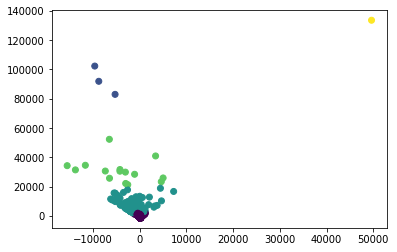

In [41]:
g = plt.scatter(x="pc1", y="pc2", c="yclass", data=df1)

### Use Clustering to improve Classification Model accuracy
  * On Hand Written Digit Recognition dataset (with 784 pixels) we got an F1-Score of 92% on train set
  * Let's add Cluster labels as a new columns (785th column) and try to build a model and see if the accuracy improves

In [22]:
cluster8_digit_X_train = np.hstack((digit_X_train, X_clusters))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
cluster8_digit_X_train = std_scale.fit_transform(cluster8_digit_X_train)

#### Build SGDModel and see if preformance improves.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=2, eta0=0.1, learning_rate='invscaling')
sgd_model.fit(cluster8_digit_X_train, digit_y_train)

In [ ]:
from sklearn.metrics import f1_score
f1_score(digit_y_train, sgd_model.predict(cluster8_digit_X_train), average='weighted')

#### We saw that 8 clusters is also good one, let's see which K is best by doing GridSearchCV

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [ ]:
digit_X_train.shape

In [ ]:
hStackClusterLabel = FeatureUnion([("kmeans", KMeans(init='k-means++', random_state = 42)),
                                    ('scaled', StandardScaler())])

sgd_pipeline = Pipeline([
        ("hStackClusterLabel", hStackClusterLabel),
        ("sgd", SGDClassifier(random_state=2, eta0=0.1, learning_rate='invscaling'))
    ])

param_grid = {
        "hStackClusterLabel__kmeans__n_clusters": [8, 18, 37, 100]
    }

grid_search = GridSearchCV(sgd_pipeline, param_grid, cv=10, scoring='f1_weighted')
grid_search.fit(digit_X_train, digit_y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
f1_score(digit_y_train, grid_search.best_estimator_.predict(digit_X_train), average='weighted')